https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/DatosMeteorologicos/Ficheros/Estructura_Estaciones%20meteorol%C3%B3gicas.pdf

https://datos.madrid.es/sites/v/index.jsp?vgnextoid=fa8357cec5efa610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD

In [1]:
import pandas as pd
import glob
import os

In [2]:
temperature_files = glob.glob(os.path.join('meteo', '*.csv'))

In [3]:
all_dataframes = [pd.read_csv(csv_file, delimiter=';') for csv_file in temperature_files]
temperatures = pd.concat(all_dataframes, ignore_index=True)

In [4]:
temperatures.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,P (89),COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28.0,79.0,102.0,81.0,28079102_81_98,2023.0,6.0,1.0,2.92,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.0,79.0,102.0,81.0,28079102_81_98,2023.0,6.0,2.0,0.88,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.0,79.0,102.0,81.0,28079102_81_98,2023.0,6.0,3.0,1.45,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.0,79.0,102.0,81.0,28079102_81_98,2023.0,6.0,4.0,0.62,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28.0,79.0,102.0,81.0,28079102_81_98,2023.0,6.0,5.0,2.22,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
temperatures.columns

Index(['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO',
       'ANO', 'MES', 'DIA', 'H01', 'V01', 'H02', 'V02', 'H03', 'V03', 'H04',
       'V04', 'H05', 'V05', 'H06', 'V06', 'H07', 'V07', 'H08', 'V08', 'H09',
       'V09', 'H10', 'V10', 'H11', 'V11', 'H12', 'V12', 'H13', 'V13', 'H14',
       'V14', 'H15', 'V15', 'H16', 'V16', 'H17', 'V17', 'H18', 'V18', 'H19',
       'V19', 'H20', 'V20', 'H21', 'V21', 'H22', 'V22', 'H23', 'V23', 'H24',
       'V24', 'CÓDIGO', 'CÓDIGO_CORTO', 'ESTACIÓN', 'DIRECCION',
       'LONGITUD_ETRS89', 'LATITUD_ETRS89', 'ALTITUD', 'VV (81)', 'DV (82)',
       'T (83)', 'HR (86)', 'PB (87)', 'RS (88)', 'P (89)', 'COD_VIA',
       'VIA_CLASE', 'VIA_PAR', 'VIA_NOMBRE', 'NUM_VIA', 'COORDENADA_X_ETRS89',
       'COORDENADA_Y_ETRS89', 'LONGITUD', 'LATITUD'],
      dtype='object')

MAGNITUD 83 = Temperatura

MAGNITUD 88 = Radiación solar

In [6]:
temperatures = temperatures[(temperatures['MAGNITUD'] == 83)]

In [7]:
temperatures.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,P (89),COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
60,28.0,79.0,102.0,83.0,28079102_83_98,2023.0,6.0,1.0,14.7,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,28.0,79.0,102.0,83.0,28079102_83_98,2023.0,6.0,2.0,11.1,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,28.0,79.0,102.0,83.0,28079102_83_98,2023.0,6.0,3.0,12.6,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,28.0,79.0,102.0,83.0,28079102_83_98,2023.0,6.0,4.0,15.0,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,28.0,79.0,102.0,83.0,28079102_83_98,2023.0,6.0,5.0,15.3,V,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
temperatures = temperatures[['ESTACION', 'ANO', 'MES', 'DIA', 'H12']]
temperatures.columns = ['station', 'year', 'month', 'day', 'temperature']
temperatures.head()

,station,year,month,day,temperature
60,102.0,2023.0,6.0,1.0,16.6
61,102.0,2023.0,6.0,2.0,14.3
62,102.0,2023.0,6.0,3.0,16.2
63,102.0,2023.0,6.0,4.0,17.3
64,102.0,2023.0,6.0,5.0,18.5


## Estaciones

In [9]:
stations = pd.read_csv('meteo/Estaciones_control_datos_meteorologicos.csv', delimiter=';')
stations.head()

,CÓDIGO,CÓDIGO_CORTO,ESTACIÓN,DIRECCION,LONGITUD_ETRS89,LATITUD_ETRS89,ALTITUD,VV (81),DV (82),T (83),...,P (89),COD_VIA,VIA_CLASE,VIA_PAR,VIA_NOMBRE,NUM_VIA,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89,LONGITUD,LATITUD
0,28079004,4,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637,NaN,NaN,X,...,NaN,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-37.122.567,404.238.823
1,28079008,8,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672,NaN,NaN,X,...,NaN,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-36.823.158,404.215.533
2,28079016,16,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695,NaN,NaN,X,...,NaN,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-36.392.422,404.400.457
3,28079018,18,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632,NaN,NaN,X,...,NaN,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-37.318.356,403.947.825
4,28079024,24,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646,X,X,X,...,X,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-37.473.445,404.193.577


In [10]:
stations = stations[['CÓDIGO_CORTO', 'COORDENADA_X_ETRS89', 'COORDENADA_Y_ETRS89']]
stations.head()

,CÓDIGO_CORTO,COORDENADA_X_ETRS89,COORDENADA_Y_ETRS89
0,4,"439579,3291","4475049,263"
1,8,"442117,2366","4474770,696"
2,16,"445786,1729","4476796,019"
3,18,"437891,6961","4471832,769"
4,24,"436598,5637","4474571,618"


In [11]:
# Change columns name
stations.columns = ['code', 'lat', 'lon']
stations.head()

,code,lat,lon
0,4,"439579,3291","4475049,263"
1,8,"442117,2366","4474770,696"
2,16,"445786,1729","4476796,019"
3,18,"437891,6961","4471832,769"
4,24,"436598,5637","4474571,618"


In [12]:
import folium
from pyproj import Transformer

In [13]:
# Transform coordinates from ETRS89 to WRS84
transformer = Transformer.from_crs('EPSG:25830', 'EPSG:4326')

# Create a map centered around the transformed coordinates
madrid_coords = (40.4168, -3.7038)
map = folium.Map(location=madrid_coords, zoom_start=13)

# Iterate over each station
for index, station in stations.iterrows():
    xx = float(station['lat'].replace(',', '.'))
    yy = float(station['lon'].replace(',', '.'))
    lat, lon = transformer.transform(xx, yy)
    # Update coordinates in dataset
    stations.at[index, 'lat'] = lat
    stations.at[index, 'lon'] = lon

    # Add a marker for the point
    folium.Marker([lat, lon], popup=station['code']).add_to(map)

# If running in a Jupyter Notebook, display the map inline
map

In [14]:
stations.head()

,code,lat,lon
0,4,40.423882,-3.712257
1,8,40.421553,-3.682316
2,16,40.440046,-3.639242
3,18,40.394782,-3.731836
4,24,40.419358,-3.747344


## Get stellite data from coordinates

In [15]:
import os, glob, rasterio, rioxarray
import numpy as np

In [16]:
# Move to data directory
os.chdir('sentinel')
print(os.getcwd())

/home/andres/University/uhi/madrid/sentinel


In [17]:
# List all .tif files
tif_list = glob.glob('*.tif')

print(tif_list[0])

20230923T110659_StudyArea.tif


In [18]:
# Reproject all files to the same CRS as in the stations
for raster_name in tif_list:
    with rioxarray.open_rasterio(raster_name) as src:
        dst = src.rio.reproject('EPSG:4326')
        dst.rio.to_raster(raster_name)

In [19]:
# Create new dataset
df = pd.DataFrame(columns=['date', 'station', 'temperature', 'nir', 'swir1', 'swir2'])
df.head()

,date,station,temperature,nir,swir1,swir2


In [20]:
# Fill with data
for raster_name in tif_list:
    year = raster_name[:4]
    month = raster_name[4:6]
    day = raster_name[6:8]
    date = year + '-' + month + '-' + day

    if month == '07':    
        with rasterio.open(raster_name) as src:
            for index, station in stations.iterrows():
                # Get temperature
                temperature_value = temperatures.loc[
                    (temperatures['station'] == station['code']) &
                    (temperatures['year'] == int(year)) &
                    (temperatures['month'] == int(month)) &
                    (temperatures['day'] == int(day)), 'temperature'].values
                temperature_value = temperature_value[0] if len(temperature_value) > 0 else np.nan
                
                # Convert the coordinates (lon, lat) to row and column
                row, col = src.index(station['lon'], station['lat'])
                
                # Read the value of the pixel
                nir_value = src.read(8)[row, col]
                swir1_value = src.read(11)[row, col]
                swir2_value = src.read(12)[row, col]
                
                df.loc[len(df.index)] = [date, station['code'], temperature_value, nir_value, swir1_value, swir2_value]

In [21]:
# Remove rows with NaN values
df = df.dropna()
df

,date,station,temperature,nir,swir1,swir2
0,2023-07-02,4,28.4,3810,4055,3578
1,2023-07-02,8,27.8,4496,3597,3045
2,2023-07-02,16,28.1,4192,3135,2559
3,2023-07-02,18,28.3,4760,3754,3098
4,2023-07-02,24,27.4,4652,5148,4468
...,...,...,...,...,...,...
228,2023-07-20,110,30.1,4006,3953,3610
230,2023-07-20,112,31.2,3858,4392,4354
231,2023-07-20,113,32.5,3858,4392,4354
232,2023-07-20,114,30.5,4272,5066,4970


## Train model with data

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from itertools import combinations

In [23]:
X = df[['nir', 'swir1', 'swir2']]
y = df['temperature']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Generate all combinations of the features
feature_combinations = []
for i in range(1, len(X.columns) + 1):
    feature_combinations.extend(combinations(X.columns, i))

In [26]:
# Create a pipeline that first creates polynomial features and then applies linear regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])

In [27]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [1, 2, 3, 4, 5],  # Trying different polynomial degrees
}

In [28]:
feature_combinations[4]

('nir', 'swir2')

In [29]:
X_train[list(feature_combinations[4])]

,nir,swir2
85,3030,2388
176,3728,3846
118,3372,2706
138,3933,2924
104,3864,3301
...,...,...
115,4500,3031
14,3656,2721
101,3596,4308
194,2560,1735


In [30]:
# Dictionary to store results
results = {}

best_stored_r2 = -1 # Best r2 score until now
best_stored_model = _ # Best model until now
best_stored_features = _ # Best features until now

# Evaluate each combination of features
for features in feature_combinations:
    # Get subsets
    X_train_subset = X_train[list(features)]
    X_test_subset = X_test[list(features)]
    
    # Use GridSearchCV to find the best parameters for the current feature combination
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train_subset, y_train)
    
    # Store the best score and parameters
    results[features] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }

    # Evaluate
    best_model = grid_search.best_estimator_
    y_train_pred = best_model.predict(X_train_subset)
    y_test_pred = best_model.predict(X_test_subset)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    if test_r2 > best_stored_r2:
        best_stored_r2 = test_r2
        best_stored_model = best_model
        best_stored_features = features

    results[features]['train_mse'] = train_mse
    results[features]['train_r2'] = train_r2
    results[features]['test_mse'] = test_mse
    results[features]['test_r2'] = test_r2

In [31]:
results

{('nir',): {'best_params': {'poly_features__degree': 3},
  'best_score': -0.0012876215945450743,
  'train_mse': 6.360182993253144,
  'train_r2': 0.08927189341642783,
  'test_mse': 6.600057973873483,
  'test_r2': 0.029024832818116186},
 ('swir1',): {'best_params': {'poly_features__degree': 1},
  'best_score': -0.04598885009631282,
  'train_mse': 6.768821336210366,
  'train_r2': 0.030758101477789568,
  'test_mse': 6.625843992166208,
  'test_r2': 0.025231292894399515},
 ('swir2',): {'best_params': {'poly_features__degree': 1},
  'best_score': -0.05029023503724659,
  'train_mse': 6.794339072108526,
  'train_r2': 0.02710416269592064,
  'test_mse': 6.757447367400675,
  'test_r2': 0.005870310040033355},
 ('nir', 'swir1'): {'best_params': {'poly_features__degree': 3},
  'best_score': 0.026145222565552562,
  'train_mse': 5.723752751342587,
  'train_r2': 0.18040369100819187,
  'test_mse': 5.689676835549805,
  'test_r2': 0.16295660758164665},
 ('nir', 'swir2'): {'best_params': {'poly_features__de

In [32]:
# Find the combination of features with the best score
best_combination = max(results, key=lambda k: results[k]['best_score'])
best_params = results[best_combination]['best_params']
best_score = results[best_combination]['best_score']

print(f'Best combination of features: {best_combination}')
print(f'Best parameters: {best_params}')
print(f'Best cross-validation score: {best_score}')

Best combination of features: ('nir', 'swir1')
Best parameters: {'poly_features__degree': 3}
Best cross-validation score: 0.026145222565552562


In [33]:
print('Best features', best_stored_features)
print('Best test R2 score', best_stored_r2)

Best features ('nir', 'swir1')
Best test R2 score 0.16295660758164665


In [34]:
index = 1
X_train_subset = X_train[list(best_stored_features)]
print(X_train_subset.iloc[index])
print('Correct value', best_stored_model.predict(X_train_subset)[index])
print('Prediction', y_train[index])

nir      3728
swir1    4039
Name: 176, dtype: int16
Correct value 28.8237723106638
Prediction 27.8


In [35]:
#import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [36]:
# Create a meshgrid for the plane
nir_grid, swir_grid = np.meshgrid(np.linspace(df['nir'].min(), df['nir'].max(), 50), np.linspace(df['swir1'].min(), df['swir1'].max(), 50))
X_grid = np.column_stack((nir_grid.ravel(), swir_grid.ravel()))

# Predict using the stored model
z_pred = best_stored_model.predict(X_grid).reshape(nir_grid.shape)values

/home/andres/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


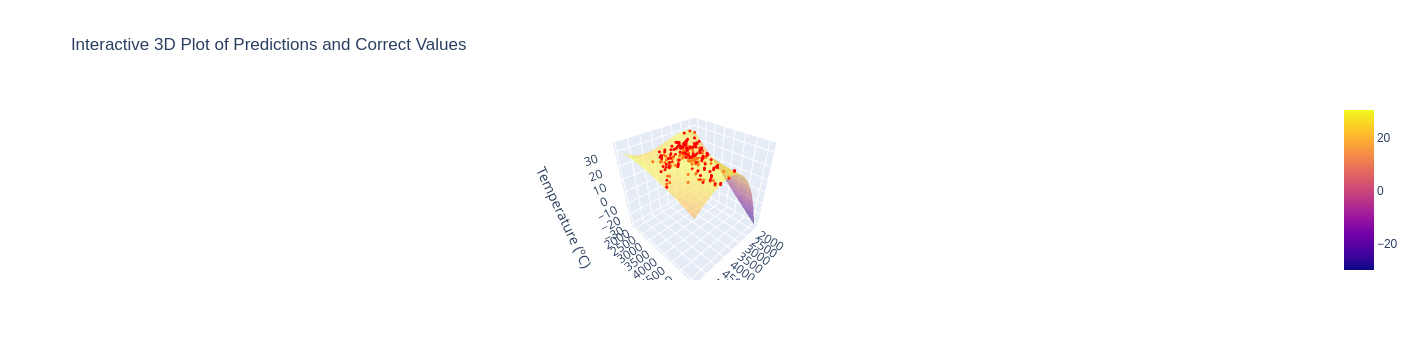

In [42]:
fig = make_subplots(specs=[[{'type': 'surface'}]])

# Add the prediction plane
plane = go.Surface(x=nir_grid, y=swir_grid, z=z_pred, colorscale='plasma', opacity=0.5)
fig.add_trace(plane)

# Add the correct values as scatter points
scatter = go.Scatter3d(x=df['nir'], y=df['swir1'], z=df['temperature'], mode='markers', marker=dict(color='red', size=1), name='Correct Values')
fig.add_trace(scatter)

# Update the layout
fig.update_layout(scene=dict(
                    xaxis_title='NIR',
                    yaxis_title='SWIR',
                    zaxis_title='Temperature (ºC)'),
                  title='Interactive 3D Plot of Predictions and Correct Values')

fig.show()

In [40]:
import joblib

os.chdir('../')

# Save the model
joblib.dump(best_stored_model, 'model.joblib')

['model.joblib']

In [41]:
'''
# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the prediction plane
ax.plot_surface(nir_grid, swir_grid, z_pred, alpha=0.5, cmap='plasma')

# Plot the correct values
#ax.scatter(nir, swir, correct_values, color='red', label='Correct Values')

# Add labels and legend
ax.set_xlabel('NIR')
ax.set_ylabel('SWIR')
ax.set_zlabel('Predicted/Correct Values')
ax.legend()

plt.show()'''

"\n# Create the 3D plot\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\n\n# Plot the prediction plane\nax.plot_surface(nir_grid, swir_grid, z_pred, alpha=0.5, cmap='plasma')\n\n# Plot the correct values\n#ax.scatter(nir, swir, correct_values, color='red', label='Correct Values')\n\n# Add labels and legend\nax.set_xlabel('NIR')\nax.set_ylabel('SWIR')\nax.set_zlabel('Predicted/Correct Values')\nax.legend()\n\nplt.show()"